In [151]:
# !pip install yfinance
# !pip install bs4
# !pip install plotly


In [152]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [153]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(
        rows=2, cols=1, shared_xaxes=True,
        subplot_titles=("Historical Share Price", "Historical Revenue"),
        vertical_spacing=0.3
    )
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(
        go.Scatter(
            x=pd.to_datetime(stock_data_specific.Date),  # removed infer_datetime_format
            y=stock_data_specific.Close.astype(float),
            name="Share Price"
        ), row=1, col=1
    )
    fig.add_trace(
        go.Scatter(
            x=pd.to_datetime(revenue_data_specific.Date),  # removed infer_datetime_format
            y=revenue_data_specific.Revenue.astype(float),
            name="Revenue"
        ), row=2, col=1
    )
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(
        showlegend=False,
        height=900,
        title=stock,
        xaxis_rangeslider_visible=True
    )
    fig.show()


### Question 1: Use yfinance to Extract Tesla Stock Data


In [155]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

# Display first five rows as required
print("Tesla stock data (first 5 rows):")
print(tesla_data.head())


Tesla stock data (first 5 rows):
                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


### Question 2: Use Webscraping to Extract Tesla Revenue Data


In [157]:
url_tesla = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/91.0.4472.124 Safari/537.36"
}
response_tesla = requests.get(url_tesla, headers=headers)
soup_tesla = BeautifulSoup(response_tesla.text, "html.parser")

data = []
for table in soup_tesla.find_all("table"):
    if any("Tesla Quarterly Revenue".lower() in th.text.lower() for th in table.find_all("th")):
        for row in table.find("tbody").find_all("tr"):
            cols = row.find_all("td")
            if len(cols) == 2:
                date_col = cols[0].text.strip()
                rev_col = cols[1].text.strip()
                data.append({"Date": date_col, "Revenue": rev_col})

tesla_revenue = pd.DataFrame(data)
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",|\$", "", regex=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue.dropna(inplace=True)

# Display last five rows as required
print("Tesla revenue data (last 5 rows):")
print(tesla_revenue.tail())


Tesla revenue data (last 5 rows):
          Date Revenue
59  2010-09-30      31
60  2010-06-30      28
61  2010-03-31      21
63  2009-09-30      46
64  2009-06-30      27


### Question 3: Use yfinance to Extract GameStop Stock Data

In [159]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)

# Display first five rows as required
print("GameStop stock data (first 5 rows):")
print(gme_data.head())


GameStop stock data (first 5 rows):
                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712708  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666417  1.666417  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


### Question 4: Use Webscraping to Extract GameStop Revenue Data



In [161]:
url_gme = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
response_gme = requests.get(url_gme, headers=headers)
soup_gme = BeautifulSoup(response_gme.text, "html.parser")

data = []
for table in soup_gme.find_all("table"):
    if any("GameStop Quarterly Revenue".lower() in th.text.lower() for th in table.find_all("th")):
        for row in table.find("tbody").find_all("tr"):
            cols = row.find_all("td")
            if len(cols) == 2:
                date_col = cols[0].text.strip()
                rev_col = cols[1].text.strip()
                data.append({"Date": date_col, "Revenue": rev_col})

gme_revenue = pd.DataFrame(data)
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",|\$", "", regex=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
gme_revenue.dropna(inplace=True)

# Display last five rows as required
print("GameStop revenue data (last 5 rows):")
print(gme_revenue.tail())


GameStop revenue data (last 5 rows):
          Date Revenue
61  2010-01-31    3524
62  2009-10-31    1835
63  2009-07-31    1739
64  2009-04-30    1981
65  2009-01-31    3492


### Question 5: Plot Tesla Stock Graph


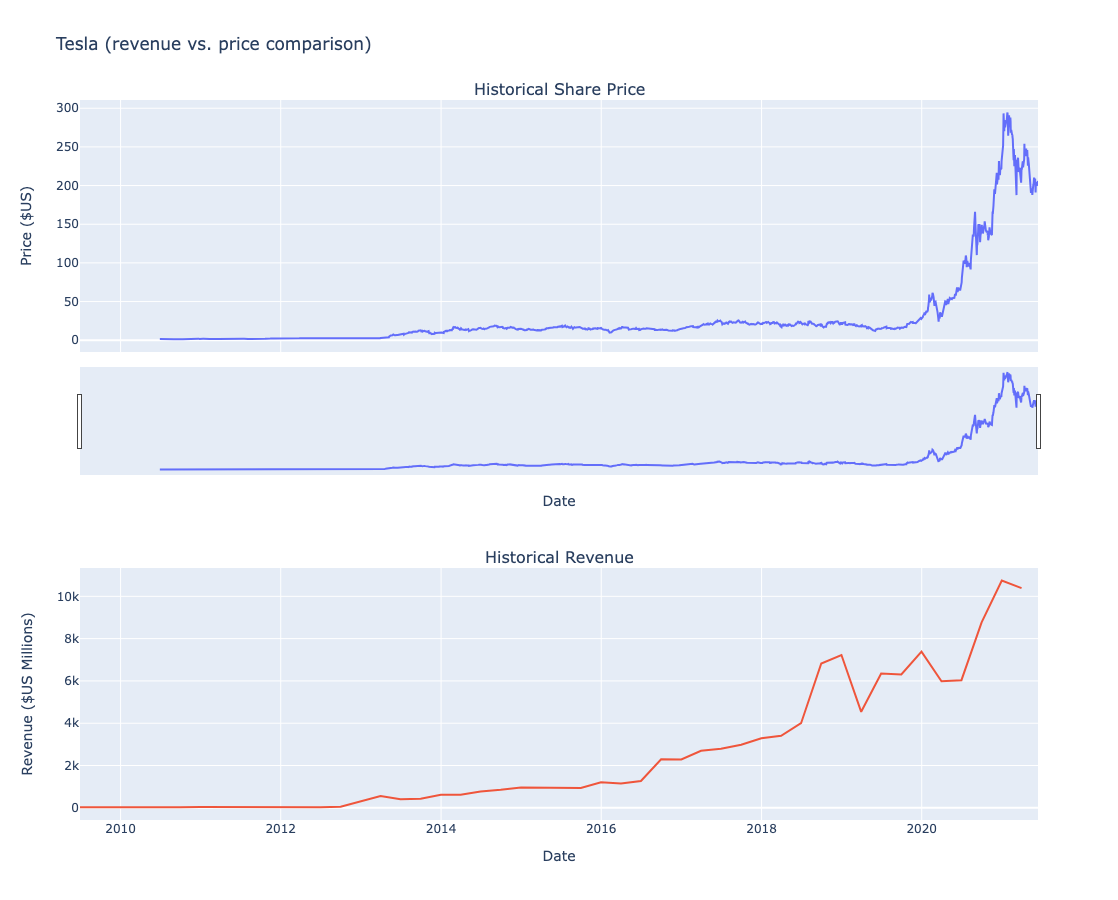

In [178]:
make_graph(tesla_data, tesla_revenue, "Tesla (revenue vs. price comparison)")

### Question 6: Plot GameStop Stock Graph


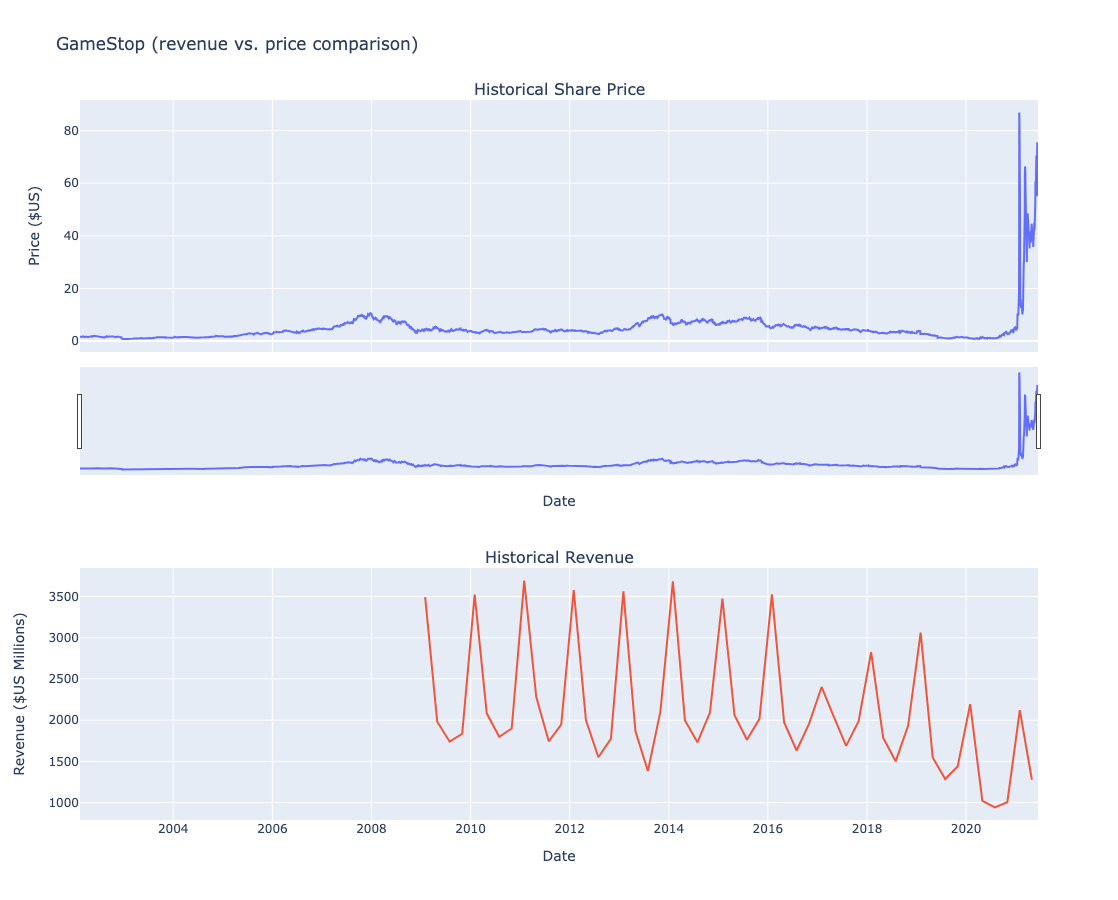

In [165]:
make_graph(gme_data, gme_revenue, "GameStop (revenue vs. price comparison)")
